In [1]:
%pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
file_path = "data/drop-out.csv"

In [3]:
data = pd.read_csv(file_path, delimiter=";")
print("We have successfully loaded the data!")

We have successfully loaded the data!


In [4]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
columns_to_remove = [
    "Application mode",
    "Application order",
    "Course",
    "Nacionality",
    "Mother's occupation",
    "Father's occupation",
    "Mother's qualification",
    "Father's qualification",
    "Previous qualification",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
]

for column in columns_to_remove:
    data.drop(column, inplace=True, axis=1)

In [6]:
data.to_csv("data/drop-out-new.csv", index=False)
print("We have successfully saved the data!")

We have successfully saved the data!


In [7]:
data = pd.read_csv("data/drop-out-new.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    4424 non-null   int64  
 1   Daytime/evening attendance	       4424 non-null   int64  
 2   Previous qualification (grade)    4424 non-null   float64
 3   Admission grade                   4424 non-null   float64
 4   Displaced                         4424 non-null   int64  
 5   Educational special needs         4424 non-null   int64  
 6   Debtor                            4424 non-null   int64  
 7   Tuition fees up to date           4424 non-null   int64  
 8   Gender                            4424 non-null   int64  
 9   Scholarship holder                4424 non-null   int64  
 10  Age at enrollment                 4424 non-null   int64  
 11  International                     4424 non-null   int64  
 12  Curric

In [8]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Target']


There are no categorical variables excluding the Target which we are trying to find

In [9]:
X = data.drop(['Target'], axis=1)
y = data['Target']

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3096, 17), (1328, 17))

In [12]:
cols = X_train.columns

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])


In [16]:
X_train.head()

,Marital status,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,3.0,-1.0,0.006667,-1.843427,-1.0,0.0,1.0,-1.0,0.0,0.0,5.000000,0.0,-5.138889,-4.722581,-0.488889,0.000000,0.914040
1,0.0,0.0,-1.000000,-0.833087,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,-0.451389,-0.774194,-0.777778,0.521739,0.000000
2,0.0,0.0,-0.133333,0.490399,0.0,0.0,0.0,0.0,0.0,1.0,-0.166667,0.0,1.111111,0.825806,0.288889,-0.391304,0.421203
3,0.0,0.0,-0.133333,-0.047267,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.399573,0.862673,0.977778,0.608696,-1.255014
4,0.0,0.0,0.006667,-0.673560,-1.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,-0.659722,-0.851613,0.622222,-0.739130,0.134670


In [17]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

In [18]:
# Get the labels predicted
y_pred = gnb.predict(X_test)

y_pred

array(['Graduate', 'Dropout', 'Graduate', ..., 'Enrolled', 'Graduate',
       'Graduate'], dtype='<U8')

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6431


The model accuracy score is very low at 0.6431

In [20]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['Dropout', 'Graduate', 'Graduate', ..., 'Graduate', 'Graduate',
       'Graduate'], dtype='<U8')

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6618


This is still a very low accuracy score even when using the training set at 0.6618

In [22]:
# check class distribution in test set
y_test.value_counts()

Target
Graduate    667
Dropout     428
Enrolled    233
Name: count, dtype: int64

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.71      0.66      0.68       428
    Enrolled       0.13      0.05      0.07       233
    Graduate       0.66      0.84      0.74       667

    accuracy                           0.64      1328
   macro avg       0.50      0.52      0.50      1328
weighted avg       0.58      0.64      0.60      1328



After looking at the classification report, we can see that the Naive Bayes classifier precision for Enrolled students is very low

In [24]:
# check null accuracy score

null_accuracy = (667/(667+428+233))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5023


In [25]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[281  31 116]
 [ 50  11 172]
 [ 63  42 562]]


Now that we know the problem is relates to Enrolled Target, we will combine both the Graduated and Enrolled Targets since all we are after is whether a student drops out or not. This is so that the Target would be a binary value.

Doing this would hopefully increase the model's accuracy.

Lets start over again but replace the 'Target' column with a column called 'Dropout' where we have a binary value for whether if the student has dropped out or not.

In [26]:
data = pd.read_csv("data/drop-out-new.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    4424 non-null   int64  
 1   Daytime/evening attendance	       4424 non-null   int64  
 2   Previous qualification (grade)    4424 non-null   float64
 3   Admission grade                   4424 non-null   float64
 4   Displaced                         4424 non-null   int64  
 5   Educational special needs         4424 non-null   int64  
 6   Debtor                            4424 non-null   int64  
 7   Tuition fees up to date           4424 non-null   int64  
 8   Gender                            4424 non-null   int64  
 9   Scholarship holder                4424 non-null   int64  
 10  Age at enrollment                 4424 non-null   int64  
 11  International                     4424 non-null   int64  
 12  Curric

In [27]:
# Mapping values to True and False
mapping = {'Graduate': False, 'Enrolled': False, 'Dropout': True}

# Replacing values in the 'Target' column
data['Target'] = data['Target'].replace(mapping)

# Renaming the 'Target' column to 'Dropout'
data = data.rename(columns={'Target': 'Dropout'})

In [28]:
data

,Marital status,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Dropout
0,1,1,122.0,127.3,1,0,0,1,1,0,20,0,0.000000,0.000000,10.8,1.4,1.74,True
1,1,1,160.0,142.5,1,0,0,0,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,False
2,1,1,122.0,124.8,1,0,0,0,1,0,19,0,0.000000,0.000000,10.8,1.4,1.74,True
3,1,1,122.0,119.6,1,0,0,1,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,False
4,2,0,100.0,141.5,0,0,0,1,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,125.0,122.2,0,0,0,1,1,0,19,0,13.600000,12.666667,15.5,2.8,-4.06,False
4420,1,1,120.0,119.0,1,0,1,0,0,0,18,1,12.000000,11.000000,11.1,0.6,2.02,True
4421,1,1,154.0,149.5,1,0,0,1,0,1,30,0,14.912500,13.500000,13.9,-0.3,0.79,True
4422,1,1,180.0,153.8,1,0,0,1,0,1,20,0,13.800000,12.000000,9.4,-0.8,-3.12,False


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    4424 non-null   int64  
 1   Daytime/evening attendance	       4424 non-null   int64  
 2   Previous qualification (grade)    4424 non-null   float64
 3   Admission grade                   4424 non-null   float64
 4   Displaced                         4424 non-null   int64  
 5   Educational special needs         4424 non-null   int64  
 6   Debtor                            4424 non-null   int64  
 7   Tuition fees up to date           4424 non-null   int64  
 8   Gender                            4424 non-null   int64  
 9   Scholarship holder                4424 non-null   int64  
 10  Age at enrollment                 4424 non-null   int64  
 11  International                     4424 non-null   int64  
 12  Curric

In [30]:
X = data.drop(['Dropout'], axis=1)
y = data['Dropout']

In [31]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
# Get the labels predicted
y_pred = gnb.predict(X_test)

y_pred

array([False,  True, False, ..., False, False, False])

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8095


Now the accuracy of the Model is higher at 0.8095 since there are only 2 values that the model can make:

True / False for the Dropout column

In [36]:
y_pred_train = gnb.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8085


In [37]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[776 124]
 [129 299]]


<Axes: >

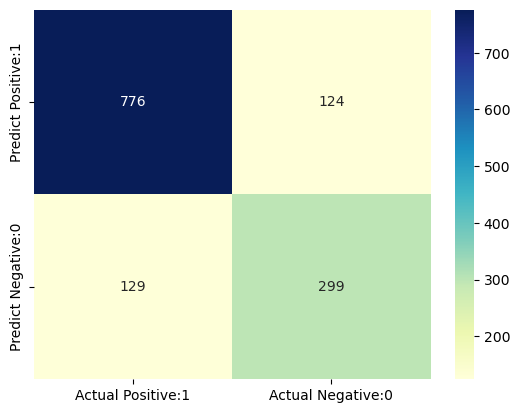

In [38]:
import seaborn as sns

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')